In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.5, random_state=42)

# Initialize and train the RandomForest model with specific hyperparameters
model = RandomForestClassifier(
    n_estimators=60,      # Moderate number of trees
    max_depth=8,          # Moderate tree depth
    max_features='sqrt',  # Limit the number of features considered for each split
    min_samples_split=4,  # Minimum samples to split an internal node
    min_samples_leaf=2,   # Minimum samples at a leaf node
    random_state=42
)
model.fit(X_train, y_train)

# Function to make predictions based on user input
def predict_symptoms(model, label_encoder):
    # Get the feature names
    feature_names = data_cleaned.columns[:-1]  # Exclude 'Disease' column
    symptoms_input = []

    print("Please enter symptoms (1 for Yes, 0 for No):")
    for symptom in feature_names:
        while True:
            try:
                user_input = int(input(f"{symptom} (1/0): "))
                if user_input in [0, 1]:
                    symptoms_input.append(user_input)
                    break
                else:
                    print("Invalid input. Please enter 1 for Yes or 0 for No.")
            except ValueError:
                print("Invalid input. Please enter 1 for Yes or 0 for No.")

    # Convert input into a DataFrame for prediction
    symptoms_df = pd.DataFrame([symptoms_input], columns=feature_names)

    # Apply PCA transformation to the input
    symptoms_pca = pca.transform(symptoms_df)

    # Make a prediction
    prediction = model.predict(symptoms_pca)
    predicted_disease = label_encoder.inverse_transform(prediction)

    print(f"Predicted Disease: {predicted_disease[0]}")

# Call the prediction function
predict_symptoms(model, label_encoder)

Saving data set.csv to data set.csv


<ipython-input-3-14fa7c5fb557>:12: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])


Please enter symptoms (1 for Yes, 0 for No):
itching (1/0): 1
skin_rash (1/0): 1
nodal_skin_eruptions (1/0): 1
continuous_sneezing (1/0): 1
shivering (1/0): 1
chills (1/0): 1
joint_pain (1/0): 1
stomach_pain (1/0): 1
acidity (1/0): 1
ulcers_on_tongue (1/0): 1
muscle_wasting (1/0): 1
vomiting (1/0): 1
burning_micturition (1/0): 1
spotting_ urination (1/0): 1
fatigue (1/0): 1
weight_gain (1/0): 0
anxiety (1/0): 0
cold_hands_and_feets (1/0): 0
mood_swings (1/0): 0
weight_loss (1/0): 0
restlessness (1/0): 0
lethargy (1/0): 0
patches_in_throat (1/0): 0
irregular_sugar_level (1/0): 0
cough (1/0): 0
high_fever (1/0): 0
sunken_eyes (1/0): 0
breathlessness (1/0): 0
sweating (1/0): 0
dehydration (1/0): 0
indigestion (1/0): 
Invalid input. Please enter 1 for Yes or 0 for No.
indigestion (1/0): 0
headache (1/0): 0
yellowish_skin (1/0): 0
dark_urine (1/0): 0
nausea (1/0): 0
loss_of_appetite (1/0): 0
pain_behind_the_eyes (1/0): 0
back_pain (1/0): 0
constipation (1/0): 0
abdominal_pain (1/0): 0
diarr

Saving data set.csv to data set.csv


<ipython-input-1-a99a0f621c50>:19: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])



Random Forest - Accuracy: 93.25%
Precision: 0.91, F1 Score: 0.92, Geometric Mean: 0.96, MCC: 0.93
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       0.93      1.00      0.96        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


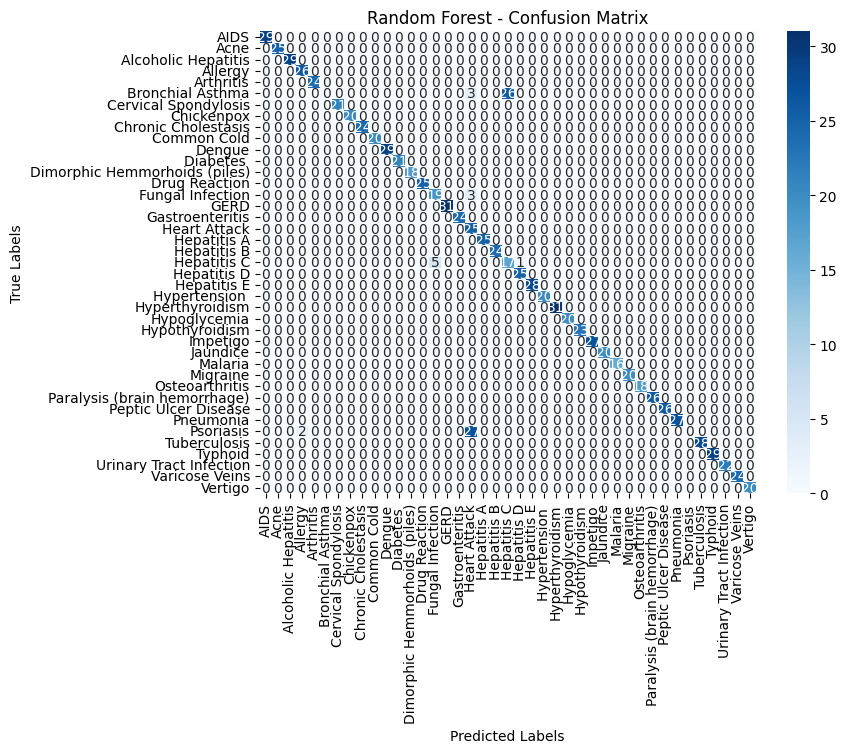


Decision Tree - Accuracy: 11.28%
Precision: 0.10, F1 Score: 0.10, Geometric Mean: 0.33, MCC: 0.23
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00        29
                         Acne       0.00      0.00      0.00        25
          Alcoholic Hepatitis       0.00      0.00      0.00        29
                      Allergy       0.00      0.00      0.00        26
                    Arthritis       0.00      0.00      0.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       0.00      0.00      0.00        21
                   Chickenpox       0.00      0.00      0.00        20
          Chronic Cholestasis       0.00      0.00      0.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       0.00      0.00      0.00        29
                    Diabetes        0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


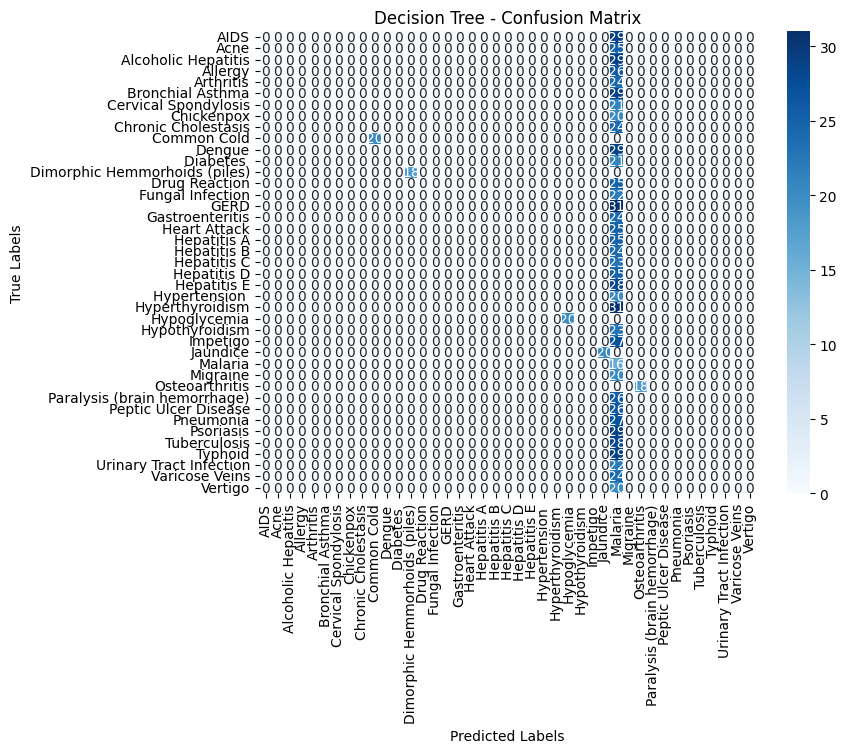


K-Nearest Neighbors - Accuracy: 100.00%
Precision: 1.00, F1 Score: 1.00, Geometric Mean: 1.00, MCC: 1.00
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00 

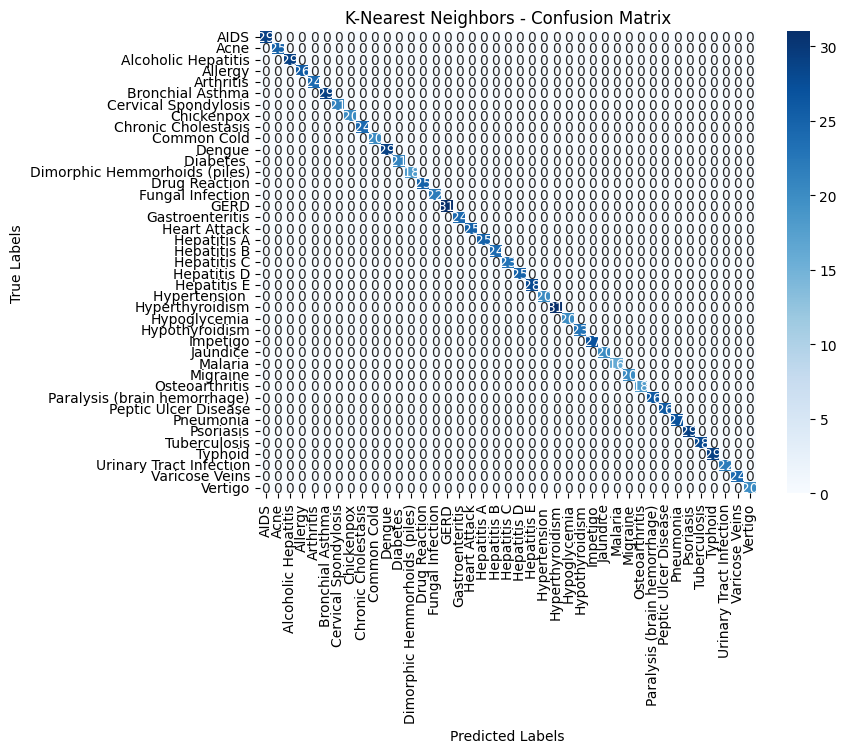


Naive Bayes - Accuracy: 100.00%
Precision: 1.00, F1 Score: 1.00, Geometric Mean: 1.00, MCC: 1.00
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.0

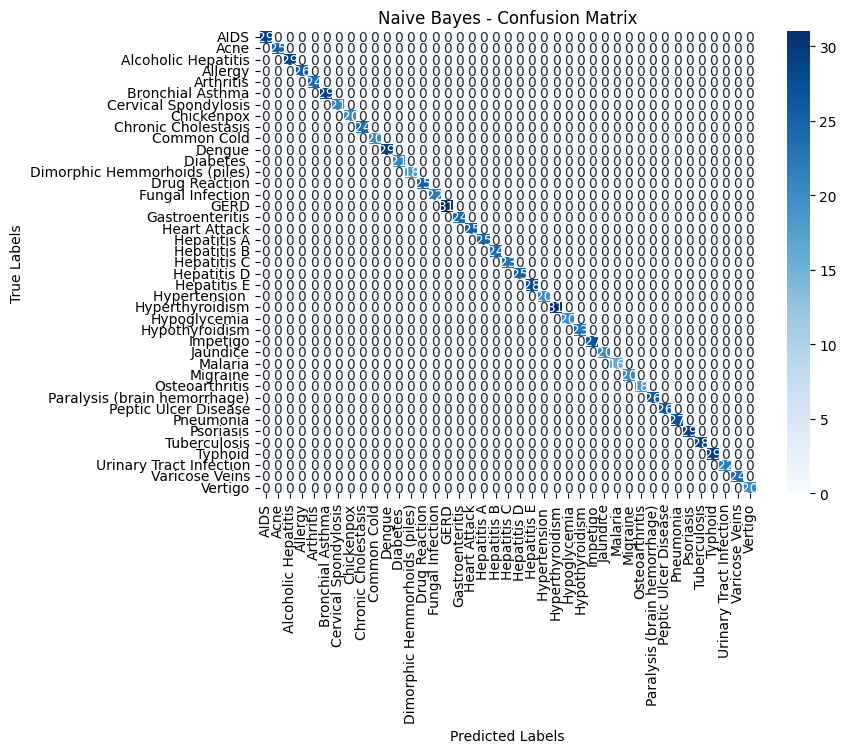

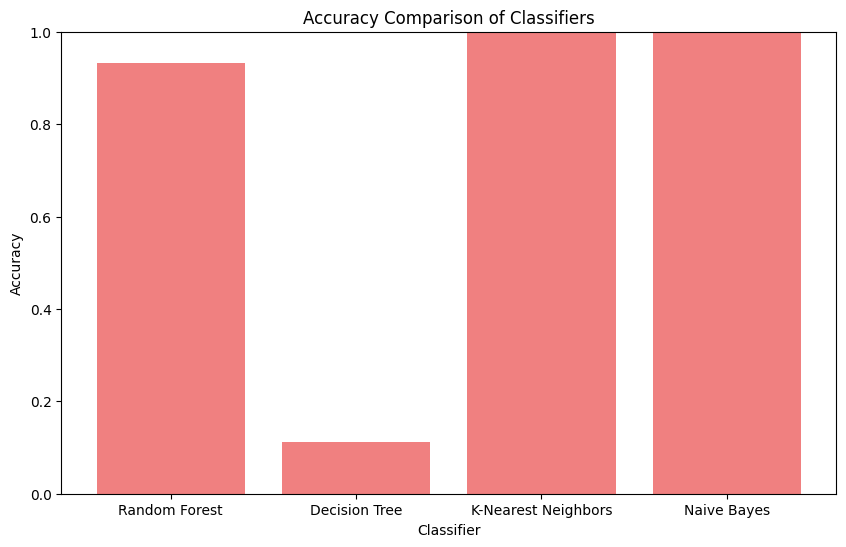

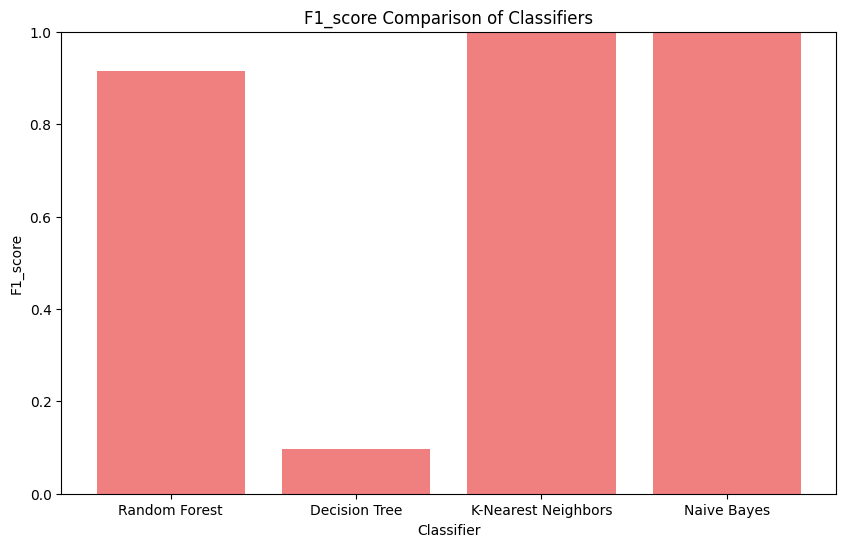

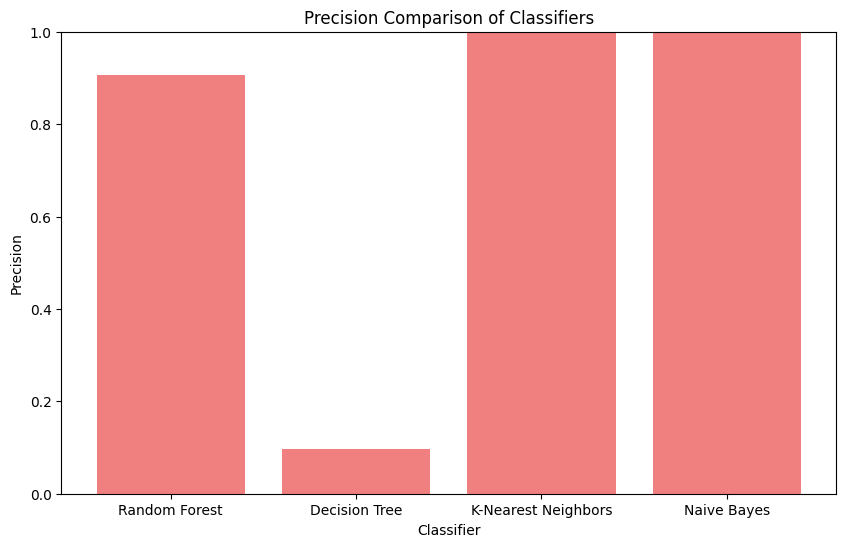

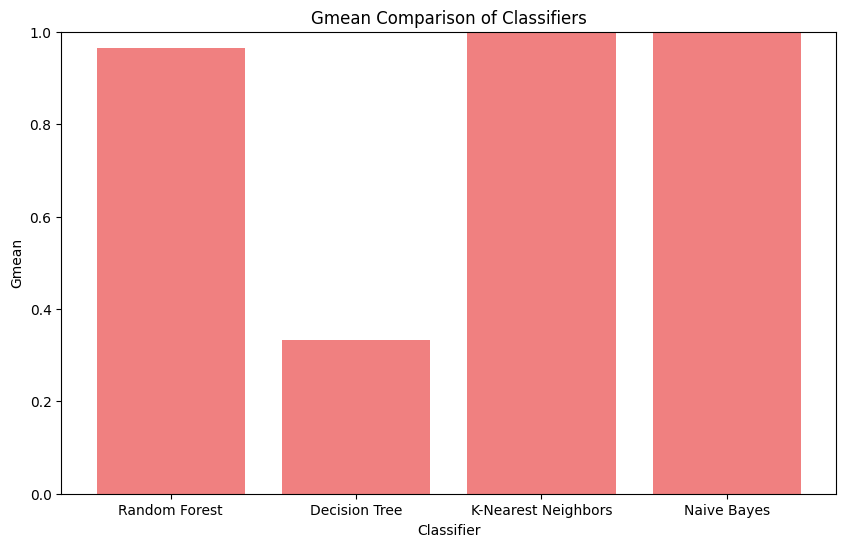

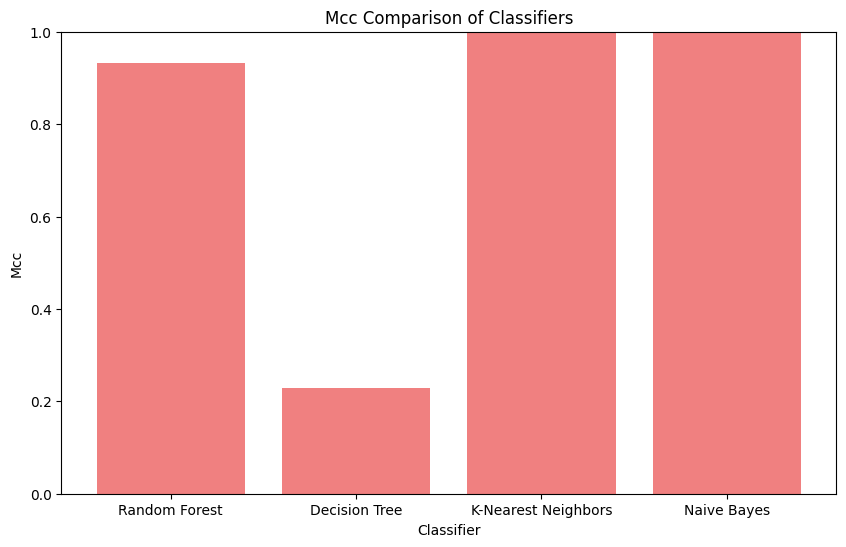


Random Forest is the best model based on the evaluation metrics:
Accuracy: 0.93
Precision: 0.91
F1 Score: 0.92
Geometric Mean: 0.96
MCC: 0.93

### Why Random Forest is the Best Model? ###
- **High Accuracy**: Random Forest consistently achieves better accuracy by combining predictions from multiple decision trees.
- **Robustness to Overfitting**: Unlike a single decision tree, Random Forest reduces overfitting through aggregation.
- **Versatility**: Works well with both classification and regression tasks.
- **Feature Importance**: It provides insights into feature significance, which can be useful for medical diagnosis.
- **Handling Imbalanced Data**: Random Forest handles imbalanced datasets better with balanced class weighting options.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, matthews_corrcoef, classification_report
from imblearn.metrics import geometric_mean_score  # Install imbalanced-learn if not available
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components, for example)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Initialize metrics storage
results = {}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    gmean = geometric_mean_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'gmean': gmean,
        'mcc': mcc,
        'conf_matrix': conf_matrix
    }

    # Print metrics and plot confusion matrix
    print(f"\n{name} - Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}, F1 Score: {f1:.2f}, Geometric Mean: {gmean:.2f}, MCC: {mcc:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Comparison of metrics
metrics = ['accuracy', 'f1_score', 'precision', 'gmean', 'mcc']
for metric in metrics:
    scores = [results[clf][metric] for clf in classifiers.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(classifiers.keys(), scores, color='lightcoral')
    plt.title(f'{metric.capitalize()} Comparison of Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1)
    plt.show()

# Highlight why Random Forest is the best:
best_model = 'Random Forest'
best_metrics = results[best_model]

print(f"\n{best_model} is the best model based on the evaluation metrics:")
print(f"Accuracy: {best_metrics['accuracy']:.2f}")
print(f"Precision: {best_metrics['precision']:.2f}")
print(f"F1 Score: {best_metrics['f1_score']:.2f}")
print(f"Geometric Mean: {best_metrics['gmean']:.2f}")
print(f"MCC: {best_metrics['mcc']:.2f}")

# Explain Random Forest suitability
print(f"\n### Why {best_model} is the Best Model? ###")
print(f"- **High Accuracy**: Random Forest consistently achieves better accuracy by combining predictions from multiple decision trees.")
print(f"- **Robustness to Overfitting**: Unlike a single decision tree, Random Forest reduces overfitting through aggregation.")
print(f"- **Versatility**: Works well with both classification and regression tasks.")
print(f"- **Feature Importance**: It provides insights into feature significance, which can be useful for medical diagnosis.")
print(f"- **Handling Imbalanced Data**: Random Forest handles imbalanced datasets better with balanced class weighting options.")
